In [50]:
# Nelder-Mead simplex algorithm is a class in graident free modules
import optimizer.gradient_free

In [51]:
# import objective functions for the test of optimizer 
import objective.test_optimizer

In [52]:
import matplotlib.pyplot as plt
import numpy as np

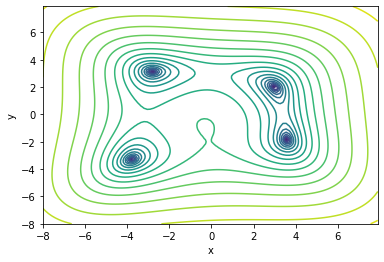

In [53]:
# Initialize the test objective function: Himmelblau
# This objective function is a mandatory for optimizer: 

# test Himmelblau function: 4 local minimum 
# minima 1: x= 3.0,        y=2.0 
# minima 2: x= -2.805118,  y=3.131312 
# minima 3: x= -3.779310,  y=-3.283186
# minima 4: x= 3.584428,   y= -1.848126 


Himmelblau_obj = objective.test_optimizer.Himmelblau()

x_limit = np.arange(-8,8,0.15) 

y_limit = np.arange(-8,8,0.15) 

Himmelblau_test = objective.test_optimizer.Himmelblau() 

# generate the Himmelblau z as function of (x,y)

z_mat = np.zeros((x_limit.size,y_limit.size))

counter_x = 0 

for x in x_limit: 

    counter_y = 0 

    for y in y_limit: 

        z_mat[counter_x,counter_y] = np.log10(Himmelblau_test.evaluate(np.array([x,y])))  
    
        counter_y += 1 

    counter_x += 1 
    
plt.xlabel("x")
plt.ylabel("y")
plt.contour(x_limit,y_limit,np.transpose(z_mat),20)   


In [54]:
# Initialize the Himmelblau optimizer: 
# input: 
    # 1. input parameter files containing: guess parameters,fix and fitted parameter, constraints ... 
    # 2. objective function: it must have "optimize" attribute, since objective functino will be evaluated as f_obj.optimize(current_parameters)
    # 3. lines to be skipped in the input file
    
optimize_Himmelblau = optimizer.gradient_free.NelderMeadSimplex("in_himmelblau","himmelblau.log",Himmelblau_obj,skipped=0)


In [55]:
text_file = open("in_himmelblau")
file_content = text_file.read()
print(file_content)
text_file.close()


# guess parameters of Himmelblau function  

Himmelblau 2.5 -1   

# fit (1) and fix (0) parameters: 

1 1 

# constraints (index lower upper)  ... ): 

None

# set termination criterion: max number of iteration, tolerance for parameters,tolerance for objective 

4000 1e-6 1e-6 

# create (Perturb) or use existing vertices (Restart): 

Nelder-Mead Perturb random 2      





In [56]:
# Run the optimization: 
# output all vertices for every:

optimize_Himmelblau.run_optimization()

current iteration: 22
best objective:  3.6654791890113376e-07
best parameters: [2.99596041 2.00477225]


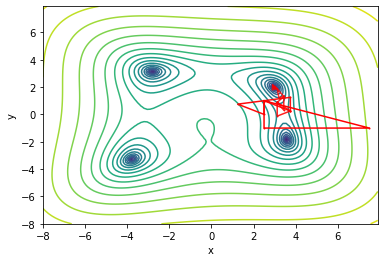

In [57]:
# read the output vertices
# the dump frequency is 2: For every 2 iteration, write out the vertices 

for i in range(0,20,2):  

    vertices = np.loadtxt("vertices_%d.txt"%i)

    # plot the simplex at every step
    plt.scatter(vertices[:,0],vertices[:,1],s=1,color="r",alpha=1-0.02*i) 

    plt.plot(vertices[:4,0],vertices[:4,1],color="r",alpha=1-0.02*i) 

# plot the contour plot Z(x,y)    
plt.xlabel("x")
plt.ylabel("y")
plt.contour(x_limit,y_limit,np.transpose(z_mat),20)   
plt.show()